**Problem 3: Least squares approximation**

**3.1** Solver linear system based on QR factorization

In [51]:
from typing import AsyncGenerator
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2022)
A = np.random.randn(20, 20)
x = np.random.randn(20,1)
b = A@x


def QR(A): # please directly copy QR function from Problem 2 here.
  #####################Your code starts here##################################
  (n, m) = np.shape(A)
  Q = np.empty([n, n])
  j = 0

  for a in A.T:
    u = np.copy(a)
    for i in range(0, j):
      proj = np.dot(np.dot(Q[:, i].T, a), Q[:, i])
      u -= proj
      
    e = u / np.linalg.norm(u)
    Q[:, j] = e
    j += 1
  R = np.dot(Q.T, A)
  #############################################################################
  return Q, R



def backSubstitute(R, b_Q):
  #######################Your code starts here #################################  
  n = len(R)
  x = np.zeros(n)
  for i in range(n - 1, -1, -1):
    temp = b_Q[i]
    for j in range(n-1, i, -1):
      temp -= x[j]*R[i][j]
    x[i] = temp / R[i][i]
  #############################################################################
  return x


def mySolver(A, b):
  Q, R = QR(A)
  b_Q = Q.T@b
  x = backSubstitute(R, b_Q)
  return x

def relative_diff(x, x_hat):
  ##########################Your code starts here###############################
  #err =  # Please use formula(23)
  ##############################################################################
  err = np.linalg.norm(x-x_hat)/np.linalg.norm(x)
  return err

x_hat = mySolver(A, b)
print("The relative error:")
print(relative_diff(x, x_hat))

The relative error:
6.138675112035648


**3.2** Data fitting by univariate linear regression

[ 1.03257036e+03 -1.98785181e+06]


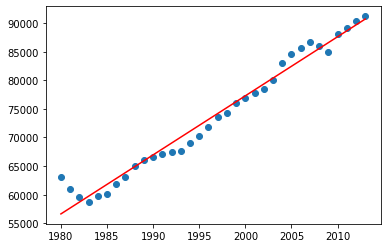

In [105]:
b_consumption = np.array([ 
        63122, 60953, 59551, 58785, 59795, 60083, 61819, 63107, 64978, 66090, 
        66541, 67186, 67396, 67619, 69006, 70258, 71880, 73597, 74274, 75975, 
        76928, 77732, 78457, 80089, 83063, 84558, 85566, 86724, 86046, 84972, 
        88157, 89105, 90340, 91195 ])

n = len(b_consumption)
##############################Your code starts here########################
# year = 
#A_consumption =  # Generate the matrix A according to formula (30)
#    Hint: numpy.vstack, numpy.hstack, and numpy.zeros may be useful for you; 
#          check numpy doc (particularly their examples) to see how to use them 
years = np.array(np.arange(1980,2014))
ones = np.array(np.zeros(len(years)) + 1)
A_consumption = np.vstack((years,ones)).T
x_hat_consumption  = mySolver(A_consumption,b_consumption)
###########################################################################

# plot the line fitting
plt.figure()
plt.scatter(np.arange(1980,2014), b_consumption)
plt.plot(np.arange(1980,2014), A_consumption @ x_hat_consumption, 'r')
plt.show()

**3.3** Data fitting with multiple features

In [112]:
from House_Sales_Data import house_sales_data 
# Please upload House_Sales_data.py file first according to first way in the contents of the link below
#https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7

F = house_sales_data()
size = F["area"]
num_beds = F["beds"]
b_price = F["price"]
num_house = len(b_price)
# print(F)
###############################Your code starts here #########################
# A_price =  # Please generate the matrix A accroding to size and num_beds
##############################################################################
beds_i = np.array(num_beds)
size_i = np.array(size)
ones = np.array(np.zeros(num_house) + 1)
A_price = np.vstack((num_beds,size,ones)).T

x_hat_price  = mySolver(A_price,b_price)

def average_diff(b_price, b_price_hat):
  #####################Your code starts here#############################
  #err =  # Please implement the average difference according to formula(32)
  #######################################################################
  err = (1/744) * np.linalg.norm(b_price - b_price_hat)
  return err
##############################Your code starts here#######################
#b_price_hat =   #Generate the estimation of price based on x_hat_price
b_price_hat = np.dot(A_price,x_hat_price)
##########################################################################
err = average_diff(b_price, b_price_hat)
print("Average difference between the actual prices and the predicted prices:")
print(err)



Average difference between the actual prices and the predicted prices:
2.798752503246047
